In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('Shill Bidding Dataset.csv')

# 2. ‰ªÖ‰øùÁïôÊ≠£Â∏∏Á´ûÊãçËÆ∞ÂΩï
df_normal = df[df['Class'] == 0]

# 3. ÊèêÂèñÁî®Êà∑Ë°å‰∏∫ÁâπÂæÅ
selected_features = [
    'Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
    'Last_Bidding', 'Early_Bidding', 'Winning_Ratio'
]
user_df = df_normal.groupby('Bidder_ID')[selected_features].mean()

| ÁâπÂæÅÂêç                      | ËØ¥Êòé              | ÊòØÂê¶Áî®‰∫éËÅöÁ±ª | ËØ¥Êòé              |
| ------------------------ | --------------- | - | --------------- |
| `Bidder_Tendency`        | Áî®Êà∑ÊäïÊ†áÈ¢ëÁéáÔºàÁõ∏ÂØπ‰∫éÊÄªÊãçÂçñÊï∞Ôºâ | ‚úÖ | Ë°°ÈáèÂèÇ‰∏éÂ∫¶           |
| `Bidding_Ratio`          | Áî®Êà∑Âá∫‰ª∑Ê¨°Êï∞ / ÊãçÂçñÊÄªÂá∫‰ª∑Êï∞ | ‚úÖ | Ë°°ÈáèÂá∫‰ª∑‰∏ªÂä®ÊÄß         |
| `Successive_Outbidding`  | Áî®Êà∑ÊòØÂê¶ËøûÁª≠Âéã‰ª∑Ëá™Â∑±      | ‚úÖ | Ë°°ÈáèÊøÄËøõÊàñÂà∑Êï∞ÊçÆÂÄæÂêë      |
| `Last_Bidding`           | ÊòØÂê¶ÂÄæÂêë‰∫éÊúÄÂêéÂá∫‰ª∑       | ‚úÖ | Ë°°ÈáèÁ≠ñÁï•ÔºöË∞®ÊÖé/ÊøÄËøõ      |
| `Early_Bidding`          | ÊòØÂê¶Âú®ÊãçÂçñÊó©ÊúüÂá∫‰ª∑       | ‚úÖ | ‰∏é‰∏äÈù¢Áõ∏ÂèçÔºåË°°ÈáèÊÄßÊ†º      |
| `Winning_Ratio`          | Ëµ¢ÂæóÊãçÂçñÁöÑÊØî‰æã         | ‚úÖ | Ë°°ÈáèÊúâÊïàÊÄß           |
| `Auction_Duration`       | ÊâÄÂèÇÊãçÊãçÂçñÁöÑÂπ≥ÂùáÊåÅÁª≠Êó∂Èïø    | ‚ùå | Áî®Â§ÑËæÉÂ∞èÔºåÈùûË°å‰∏∫ÁâπÂæÅ      |
| `Starting_Price_Average` | Ëµ∑Êãç‰ª∑ÂùáÂÄº           | ‚ùå | ÂÆπÊòìÂºïÂÖ•ÂÅèÂ∑Æ          |
| `Auction_Bids`           | ÊâÄÂèÇ‰∏éÊãçÂçñ‰∏≠Âá∫‰ª∑ÊÄªÊï∞      | ‚ùå | ÊãçÂçñÂ±ÇÁ∫ßÁâπÂæÅÔºå‰∏çÊòØÁî®Êà∑Êú¨Ë∫´Ë°å‰∏∫ |


In [8]:
# 4. Ê†áÂáÜÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_df)

# 5. ËÅöÁ±ª
kmeans = KMeans(n_clusters=3, random_state=42)
user_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
# 6. ËÅöÁ±ª‰∏≠ÂøÉËß£Èáä
print(user_df.groupby('Cluster').mean())

         Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
Cluster                                                                        
0               0.220563       0.077620               0.015678      0.681294   
1               0.190037       0.086992               0.005960      0.235508   
2               0.439354       0.188598               0.045727      0.297890   

         Early_Bidding  Winning_Ratio  
Cluster                                
0             0.658644       0.216663  
1             0.218311       0.196757  
2             0.267043       0.720579  


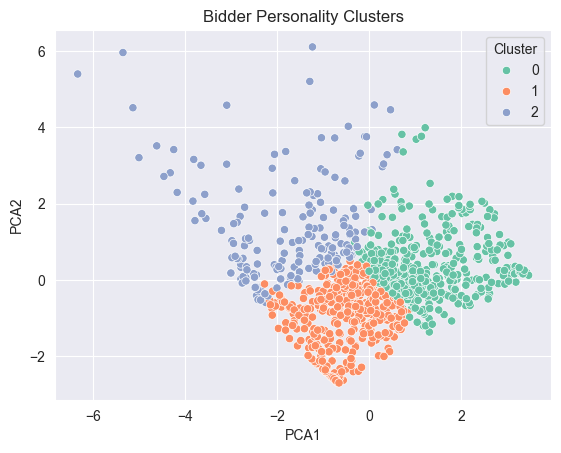

In [10]:
# 7. ÂèØËßÜÂåñ
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
user_df['PCA1'], user_df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

sns.scatterplot(data=user_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Bidder Personality Clusters")
plt.show()

üü¶ Cluster 0 ‚Äî ‰øùÂÆàÂûãÁî®Êà∑

    Âá∫‰ª∑ÂÄæÂêë‰Ωé‰∏≠Ôºà0.22ÔºâÔºåÈ¢ëÁéá‰πü‰ΩéÔºà0.077Ôºâ

    Êä¨‰ª∑‰∏çÂ§öÔºà0.015ÔºâÔºå‰ΩÜÊúâÂæàÂº∫ÁöÑ**‚ÄúÂêéÊúüÂá∫‰ª∑‚ÄùË°å‰∏∫**ÔºàLast_Bidding = 0.68Ôºâ

    Early_Bidding ÊûÅÈ´òÔºà0.66Ôºâ‚Üí Ë°®ÊòéË°å‰∏∫‰∏§ÊûÅÔºöÊó©Êó©ÊåÇÂçï+ÊúÄÂêéÁåõÂá∫‰∏ÄÊ¨°

    ËÉúÁéá‰ΩéÔºà0.216Ôºâ

üìå ÊÄßÊ†ºÊ†áÁ≠æÔºö‰øùÂÆàÂûã
üß† Ëß£ÈáäÔºö Ë∞®ÊÖé‰ΩÜ‚ÄúÊáÇÂ•óË∑Ø‚ÄùÔºå‰∏çÂñúÊ¨¢È¢ëÁπÅÂá∫‰ª∑Ôºå‰ΩÜ‰ºö‰∏ÄÂºÄÂßãËßÇÂØü„ÄÅÊúÄÂêéÂÜ≤Âà∫„ÄÇ
üü® Cluster 1 ‚Äî Ê≠£Â∏∏ÂûãÁî®Êà∑

    ÂêÑÈ°πÈÉΩÂÅè‰ΩéÊàñ‰∏≠ËßÑ‰∏≠Áü©ÔºàÂ¶Ç Bidder_Tendency = 0.19, Bidding_Ratio = 0.087Ôºâ

    Âá∫‰ª∑Êó∂Èó¥ÂÅèÊó©ÔºàLast_Bidding = 0.235ÔºâÔºåEarly_Bidding ‰πüËæÉ‰ΩéÔºà0.218Ôºâ

    ËÉúÁéáÊúÄ‰ΩéÔºà0.196Ôºâ

üìå ÊÄßÊ†ºÊ†áÁ≠æÔºöÊ≠£Â∏∏Âûã
üß† Ëß£ÈáäÔºö ÂèÇ‰∏é‰∏çÊ∑±„ÄÅÂá∫‰ª∑‰∏≠Â∫∏ÔºåÂ±û‰∫éÂÖ∏Âûã‚ÄúÈöèÁºò‰π∞ÂÆ∂‚Äù‚Äî‚ÄîÂ∞ùËØïÂèÇ‰∏é‰ΩÜ‰∏çÊâßÁùÄÔºåË°å‰∏∫Ê≤°ÊúâÊòéÁ°ÆÁ≠ñÁï•„ÄÇ
üü• Cluster 2 ‚Äî ÊøÄËøõÂûãÁî®Êà∑

    ÊâÄÊúâ‚ÄúÁßØÊûÅË°å‰∏∫‚ÄùÊåáÊ†áÊúÄÈ´òÔºöÂá∫‰ª∑ÂÄæÂêëÔºà0.44Ôºâ„ÄÅÈ¢ëÁéáÔºà0.188Ôºâ„ÄÅËøûÁª≠Êä¨‰ª∑Ôºà0.045Ôºâ

    ËÉúÁéáÈÅ•ÈÅ•È¢ÜÂÖàÔºà0.720ÔºâËØ¥ÊòéÈùûÂ∏∏ÊàêÂäü

    Âá∫‰ª∑Êó∂Èó¥‰∏≠Èó¥ÂÅèÂêéÊúüÔºåÊó©ÊúüÂá∫‰ª∑‰πüÈÄÇ‰∏≠

üìå ÊÄßÊ†ºÊ†áÁ≠æÔºöÊøÄËøõÂûã
üß† Ëß£ÈáäÔºö ÂèÇ‰∏éÂ∫¶È´ò„ÄÅË°å‰∏∫ÊòéÊòæÔºåÂÖ∑ÊúâÁõÆÊ†áÊÄß‰∏éÁ´û‰∫âÊ¨≤ÔºåÂ±û‰∫éÁúüÊ≠£‚Äú‰∫âÊä¢Âûã‚ÄùÁöÑÈ´òÂº∫Â∫¶Á´ûÊãçËÄÖ„ÄÇ

ËÅöÁ±ªÊï∞Ôºà‰∏çÂê´Âô™Â£∞Ôºâ: 4
Âô™Â£∞ÁÇπÊï∞Èáè: 33

ÊØèÁ±ªËÅöÁ±ªÁöÑÂπ≥ÂùáÁâπÂæÅÂÄºÔºö
                 Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
HDBSCAN_Cluster                                                          
-1                      0.659663       0.227535               0.264899   
 0                      1.000000       0.199907               0.000000   
 1                      0.165431       0.094023               0.009766   
 2                      1.000000       0.089522               0.000000   
 3                      1.000000       0.062633               0.000000   

                 Last_Bidding  Early_Bidding  Winning_Ratio  
HDBSCAN_Cluster                                              
-1                   0.405504       0.317033       0.255628  
 0                   0.433322       0.386296       1.000000  
 1                   0.427939       0.408825       0.285054  
 2                   0.051114       0.037829       0.000000  
 3                   0.

C:\Users\Hastu\anaconda3\envs\NIS3317\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hastu\anaconda3\envs\NIS3317\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


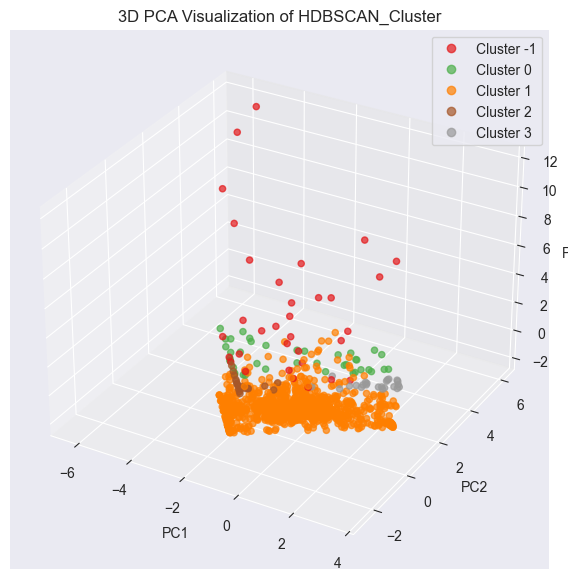

In [19]:
import pandas as pd
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 5. HDBSCAN ËÅöÁ±ª
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
user_df['HDBSCAN_Cluster'] = clusterer.fit_predict(X_scaled)

# 6. Êü•ÁúãËÅöÁ±ªÊï∞ÈáèÂíåÂô™Â£∞ÁÇπÊï∞Èáè
n_clusters = len(set(user_df['HDBSCAN_Cluster'])) - (1 if -1 in user_df['HDBSCAN_Cluster'].values else 0)
n_noise = list(user_df['HDBSCAN_Cluster']).count(-1)

print(f"ËÅöÁ±ªÊï∞Ôºà‰∏çÂê´Âô™Â£∞Ôºâ: {n_clusters}")
print(f"Âô™Â£∞ÁÇπÊï∞Èáè: {n_noise}")
print("\nÊØèÁ±ªËÅöÁ±ªÁöÑÂπ≥ÂùáÁâπÂæÅÂÄºÔºö")
print(user_df.groupby('HDBSCAN_Cluster')[selected_features].mean())

from sklearn.decomposition import PCA

# ÂØπÊï∞ÊçÆËøõË°å 3 Áª¥ PCA ÈôçÁª¥
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ÂøÖÈ°ªÂºïÂÖ•

# Êñ∞Âª∫ 3D ÂõæÂΩ¢
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# ÁªòÂà∂Êï£ÁÇπÂõæÔºåÊåâ GMM ËÅöÁ±ªÊ†áÁ≠æÁùÄËâ≤
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=user_df['HDBSCAN_Cluster'],  # ÊàñÂÖ∂‰ªñËÅöÁ±ªÁªìÊûúÔºåÂ¶Ç KMeans_Cluster
    cmap='Set1', s=20, alpha=0.7
)

# ËÆæÁΩÆÊ†áÁ≠æ
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization of HDBSCAN_Cluster")

# Ê∑ªÂä†Âõæ‰æã
legend_labels = [f"Cluster {i}" for i in sorted(user_df['HDBSCAN_Cluster'].unique())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.show()




GMM ËÅöÁ±ªÁªìÊûúÔºàÊØèÁ±ªÁî®Êà∑ÁöÑÂπ≥ÂùáÁâπÂæÅÔºâ:
             Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
GMM_Cluster                                                          
0                   0.290056       0.056847               0.004556   
1                   0.205654       0.101976               0.021345   
2                   0.491829       0.169065               0.006410   

             Last_Bidding  Early_Bidding  Winning_Ratio  
GMM_Cluster                                              
0                0.800816       0.797287       0.032187  
1                0.363618       0.337708       0.263982  
2                0.334255       0.312905       0.983654  


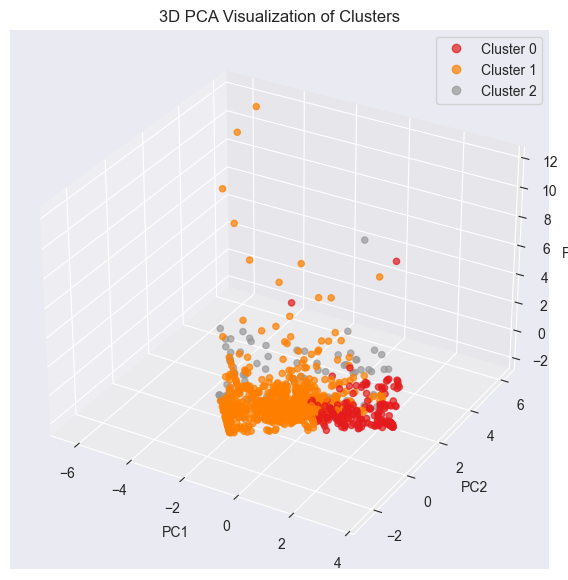

In [18]:
from sklearn.mixture import GaussianMixture

# 5. È´òÊñØÊ∑∑ÂêàÊ®°ÂûãËÅöÁ±ªÔºåÊåáÂÆö 3 Á±ª
gmm = GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
user_df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# 6. Êü•ÁúãÊØèÁ±ªÁöÑÂπ≥ÂùáÁâπÂæÅÔºåÁî®‰∫éÂàÜÊûêÊÄßÊ†º
print("\nGMM ËÅöÁ±ªÁªìÊûúÔºàÊØèÁ±ªÁî®Êà∑ÁöÑÂπ≥ÂùáÁâπÂæÅÔºâ:")
print(user_df.groupby('GMM_Cluster')[selected_features].mean())

from sklearn.decomposition import PCA

# ÂØπÊï∞ÊçÆËøõË°å 3 Áª¥ PCA ÈôçÁª¥
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ÂøÖÈ°ªÂºïÂÖ•

# Êñ∞Âª∫ 3D ÂõæÂΩ¢
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# ÁªòÂà∂Êï£ÁÇπÂõæÔºåÊåâ GMM ËÅöÁ±ªÊ†áÁ≠æÁùÄËâ≤
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=user_df['GMM_Cluster'],  # ÊàñÂÖ∂‰ªñËÅöÁ±ªÁªìÊûúÔºåÂ¶Ç KMeans_Cluster
    cmap='Set1', s=20, alpha=0.7
)

# ËÆæÁΩÆÊ†áÁ≠æ
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization of Clusters")

# Ê∑ªÂä†Âõæ‰æã
legend_labels = [f"Cluster {i}" for i in sorted(user_df['GMM_Cluster'].unique())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.show()

